In [1]:
#pip install git+https://github.com/mjkvaak/ImageDataAugmentor

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

%matplotlib inline

# Шаг первый изучить данные, представленные для обучения

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,05317.jpg,25,55,63,39,145,36,171,45,39,...,159,65,113,103,79,148,113,148,143,141
1,04767.jpg,17,32,39,27,56,22,81,16,20,...,86,28,56,66,45,80,59,80,74,76
2,05241.jpg,33,44,70,44,119,41,142,41,33,...,144,56,94,101,74,135,89,135,112,133
3,03849.jpg,96,157,222,143,389,129,517,125,153,...,467,188,328,339,241,451,335,453,419,441
4,00952.jpg,13,19,30,16,51,17,66,16,18,...,59,23,39,43,31,56,41,56,49,55


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5000 non-null   object
 1   x1        5000 non-null   int64 
 2   y1        5000 non-null   int64 
 3   x2        5000 non-null   int64 
 4   y2        5000 non-null   int64 
 5   x3        5000 non-null   int64 
 6   y3        5000 non-null   int64 
 7   x4        5000 non-null   int64 
 8   y4        5000 non-null   int64 
 9   x5        5000 non-null   int64 
 10  y5        5000 non-null   int64 
 11  x6        5000 non-null   int64 
 12  y6        5000 non-null   int64 
 13  x7        5000 non-null   int64 
 14  y7        5000 non-null   int64 
 15  x8        5000 non-null   int64 
 16  y8        5000 non-null   int64 
 17  x9        5000 non-null   int64 
 18  y9        5000 non-null   int64 
 19  x10       5000 non-null   int64 
 20  y10       5000 non-null   int64 
 21  x11       5000

In [6]:
train.shape

(5000, 29)

__filename содержит данные о лицах, для которых 28 последующих столбцов представляют данные ключевых точек (14 х-координаты и 14 у-координаты). Пропусков в данных отсутсвуют. Давайте отобразим лица.__

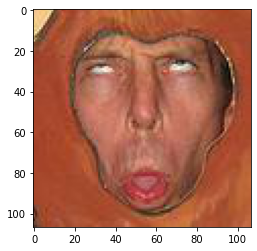

(107, 107)

In [7]:
image = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\02748.jpg')
imgplot = plt.imshow(image)
plt.show()
image.size

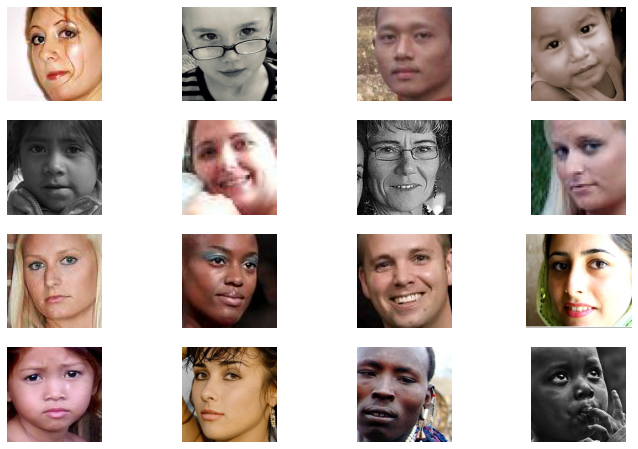

In [8]:
plt.figure(figsize=(12,8))
random_image = train.sample(n=16)
random_image_paths = random_image['filename'].values
for index, path in enumerate(random_image_paths):
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + path)
    plt.subplot(4,4, index+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

__Давайте теперь добавим к этому рисунку отмеченные ключевые точки лица.__

In [9]:
keypoint_cols = list(train.columns)[1:]

In [10]:
xy = train.iloc[0][keypoint_cols].values.reshape((14, 2))
xy 

array([[25, 55],
       [63, 39],
       [145, 36],
       [171, 45],
       [39, 74],
       [61, 69],
       [79, 72],
       [130, 68],
       [145, 65],
       [159, 65],
       [113, 103],
       [79, 148],
       [113, 148],
       [143, 141]], dtype=object)

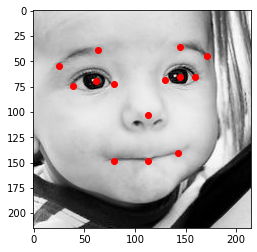

In [11]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + train.iloc[0]['filename'])
plt.imshow(im, cmap='gray')

Теперь оценим их на разных фотографиях

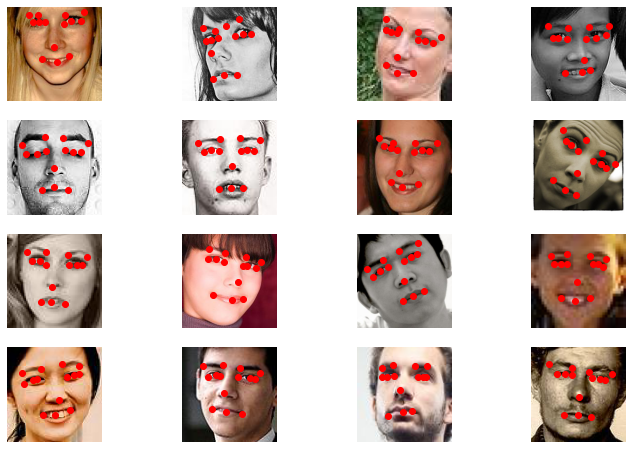

In [12]:
plt.figure(figsize=(12,8))
random_image = train.sample(n=16)
random_image_paths = random_image['filename'].values
keypoint_cols = list(random_image.columns)[1:]
keypoints = random_image[keypoint_cols]

for index, path in enumerate(random_image_paths):
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + path)
    xy = keypoints.iloc[index][keypoint_cols].values.reshape((14, 2))
    plt.subplot(4,4, index+1)
    plt.plot(xy[:, 0], xy[:, 1], 'ro')
    plt.imshow(im)
    plt.axis('off')
plt.show()

Из изображений рисунков можно сделать следующие выводы:

1. Некоторые изображения имеют высокое разрешение, некоторые - низкое
2. Некоторые изображения цветные, некоторые чернобелые
3. Разный угол повората лица
4. На изображении могут встречаться несколько лиц

Необходимо проанализировать статистику, связанную разрешением картинок

In [13]:
image_size_train = []
for path in train['filename']:
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + path)
    image_size_train.append(im.size)


In [14]:
image_size_train

[(215, 215),
 (112, 112),
 (195, 195),
 (645, 645),
 (80, 80),
 (613, 613),
 (200, 200),
 (119, 119),
 (928, 928),
 (240, 240),
 (1070, 1070),
 (180, 180),
 (137, 137),
 (239, 239),
 (796, 796),
 (165, 165),
 (544, 587),
 (216, 216),
 (785, 785),
 (170, 170),
 (402, 406),
 (257, 257),
 (424, 424),
 (113, 113),
 (271, 285),
 (152, 152),
 (1238, 1180),
 (45, 45),
 (177, 177),
 (371, 371),
 (175, 175),
 (1443, 1443),
 (120, 120),
 (124, 124),
 (263, 263),
 (145, 145),
 (126, 126),
 (232, 232),
 (187, 187),
 (255, 255),
 (706, 706),
 (205, 192),
 (142, 142),
 (172, 172),
 (54, 54),
 (64, 64),
 (236, 236),
 (146, 146),
 (735, 735),
 (572, 572),
 (66, 66),
 (126, 126),
 (124, 124),
 (1774, 1774),
 (1025, 1025),
 (1432, 1432),
 (185, 185),
 (314, 314),
 (86, 86),
 (228, 228),
 (144, 144),
 (174, 174),
 (697, 697),
 (125, 125),
 (154, 154),
 (55, 55),
 (145, 145),
 (216, 216),
 (303, 303),
 (2029, 2089),
 (52, 52),
 (1824, 1824),
 (145, 145),
 (209, 209),
 (780, 780),
 (122, 122),
 (228, 228),

In [15]:
data_test = os.listdir('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\test\\')

In [16]:
image_size_test = []
for path in data_test:
    im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\test\\' + path)
    image_size_test.append(im.size)

In [17]:
image_size_test

[(81, 81),
 (229, 229),
 (268, 268),
 (421, 421),
 (1873, 1873),
 (529, 529),
 (137, 137),
 (1494, 1494),
 (109, 109),
 (301, 301),
 (1457, 1457),
 (1247, 1247),
 (750, 750),
 (218, 218),
 (124, 124),
 (1413, 1413),
 (1040, 1040),
 (260, 260),
 (290, 301),
 (278, 278),
 (242, 242),
 (140, 140),
 (252, 252),
 (285, 285),
 (332, 356),
 (245, 245),
 (468, 468),
 (230, 230),
 (185, 185),
 (847, 847),
 (244, 244),
 (717, 717),
 (84, 84),
 (751, 726),
 (1107, 1107),
 (165, 165),
 (432, 432),
 (104, 104),
 (98, 98),
 (164, 164),
 (2209, 2209),
 (105, 105),
 (166, 189),
 (698, 698),
 (340, 340),
 (1541, 1541),
 (239, 239),
 (171, 171),
 (240, 240),
 (159, 159),
 (229, 229),
 (1694, 1694),
 (125, 125),
 (633, 633),
 (113, 113),
 (171, 171),
 (272, 272),
 (138, 138),
 (223, 223),
 (222, 222),
 (73, 73),
 (1452, 1452),
 (121, 121),
 (191, 191),
 (227, 227),
 (2019, 1735),
 (167, 167),
 (1024, 1195),
 (220, 220),
 (268, 268),
 (109, 109),
 (230, 230),
 (182, 182),
 (310, 310),
 (1166, 1166),
 (409

Как видно имеются разное разрешение изображений, это требует приведение их к одному стандарту размера.
Также после того как будет изменен единый стандарт у нас также будут изменены координаты ключевых точек
Для решения поставленной задачи можно использовать две библиотеки imgaug и albumentations, для решения буду использовать albumentations

In [18]:
import albumentations
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90, RandomShadow, 
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)
from ImageDataAugmentor.image_data_augmentor import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
im = Image.open('C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\' + train.iloc[0]['filename'])

image = np.array(im)

In [20]:
keypoint_cols = list(train.columns)[1:]
keypoints = train.iloc[0][keypoint_cols].values.reshape((14, 2))
kps = np.array(keypoints)

In [21]:
keypoints

array([[25, 55],
       [63, 39],
       [145, 36],
       [171, 45],
       [39, 74],
       [61, 69],
       [79, 72],
       [130, 68],
       [145, 65],
       [159, 65],
       [113, 103],
       [79, 148],
       [113, 148],
       [143, 141]], dtype=object)

In [22]:
transform = albumentations.Compose([
    albumentations.Resize(96, 96, 3), \
    HorizontalFlip(p=0.1),
    OneOf([
        RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15),
        RandomBrightnessContrast(brightness_limit=0.05, contrast_limit=0.05)
    ], p=0.01),
    Blur(p=0.01),
    HueSaturationValue(p=0.01),
        
], keypoint_params=albumentations.KeypointParams(format='xy'))


In [23]:
transformed = transform(image=image, keypoints=kps)
transformed_image = transformed['image']
transformed_keypoints = transformed['keypoints']

In [24]:
transformed_keypoints = np.array(transformed_keypoints)

In [25]:
transformed_image.shape

(96, 96, 3)

In [26]:
len(transformed_keypoints)

14

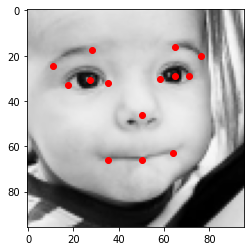

In [27]:
plt.plot(transformed_keypoints[:, 0], transformed_keypoints[:, 1], 'ro')
plt.imshow(transformed['image'])

Преобразуем данные в необходимый нам формат и, соотвественно, скорректируем ключевые точки

In [28]:
PATH = 'C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\train\\'

In [29]:
keypoints_train = []
images = []

for index in train.index:
    try:
        im = Image.open(PATH + train.loc[index]['filename'])
        image = np.array(im.convert('RGB'),'f')    
        keypoints = train.iloc[index][keypoint_cols].values.reshape((14, 2))
        kps = np.array(keypoints)
        transformed = transform(image=image, keypoints=kps)
        transformed_image = transformed['image']
        transformed_keypoints = transformed['keypoints']
        transformed_keypoints = np.array(transformed_keypoints)
        keypoints_train.append(transformed_keypoints.reshape(1,28))
        images.append(transformed_image)

    except:
        print(f"Don't tranform {PATH + train.loc[index]['filename']}")
    

In [30]:
X = np.stack([images[i] for i in range(0,len(images))])

In [31]:
X.shape

(5000, 96, 96, 3)

In [32]:
y = np.vstack(keypoints_train)

In [33]:
y.shape

(5000, 28)

In [34]:
X_train = X / 255.

# Построение модели Keras ¶
Построим модель Keras с данными. Прежде чем это сделаем, сначала сделаем некоторую предварительную обработку, используя конвейеры scikit-learn.

Идея конвейерной обработки заключается в том, что она позволяет легко отслеживать преобразования данных. Нам необходимо два масштабирования: один для входа и один для выхода. Поскольку мне не удалось заставить масштабирование работать с данными трехмерного изображения, мы будем использовать только конвейер для наших выходных данных.

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [36]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten
from keras import optimizers

In [37]:
model_1 = Sequential()
# input layer
model_1.add(BatchNormalization(input_shape=(96, 96, 3)))
model_1.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 2
model_1.add(Conv2D(36, (5, 5)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 3
model_1.add(Conv2D(48, (5, 5)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 4
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_1.add(Dropout(0.2))
# layer 5
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(Flatten())
# layer 6
model_1.add(Dense(500, activation="relu"))
# layer 7
model_1.add(Dense(90, activation="relu"))
# layer 8
model_1.add(Dense(28))

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 96, 96, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 92, 92, 24)        1824      
_________________________________________________________________
activation (Activation)      (None, 92, 92, 24)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 24)        0         
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 36)        21636     
_________________________________________________________________
activation_1 (Activation)    (None, 42, 42, 36)        0

In [39]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
rms = optimizers.RMSprop(learning_rate=0.01)
ada = optimizers.Adagrad(learning_rate=0.01, initial_accumulator_value=0.5)
adadelta = optimizers.Adadelta(learning_rate=0.01, rho=0.8)
adam = optimizers.Adam(learning_rate = 0.01)
adamax = optimizers.Adamax(learning_rate = 0.001)
nadam = optimizers.Nadam(learning_rate = 0.01)


model_1.compile(optimizer=adamax, loss='mse', metrics=['mape'])
epochs = 200
history = model_1.fit(X_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Epoch 1/200
200/200 [==============================] - 65s 318ms/step - loss: 0.0703 - mape: 126.3427 - val_loss: 0.0846 - val_mape: 102.0574
Epoch 2/200
200/200 [==============================] - 64s 322ms/step - loss: 0.0601 - mape: 112.6907 - val_loss: 0.0623 - val_mape: 93.2536
Epoch 3/200
200/200 [==============================] - 59s 294ms/step - loss: 0.0543 - mape: 94.8010 - val_loss: 0.0552 - val_mape: 91.7987
Epoch 4/200
200/200 [==============================] - 64s 319ms/step - loss: 0.0548 - mape: 102.3610 - val_loss: 0.0514 - val_mape: 93.8085
Epoch 5/200
200/200 [==============================] - 64s 318ms/step - loss: 0.0523 - mape: 99.0091 - val_loss: 0.0490 - val_mape: 94.4484
Epoch 6/200
200/200 [==============================] - 61s 307ms/step - loss: 0.0513 - mape: 90.5774 - val_loss: 0.0468 - val_mape: 88.0391
Epoch 7/200
200/200 [==============================] - 60s 299ms/step - loss: 0.0464 - mape: 86.0209 - val_loss: 0.0470 - val_mape: 89.7895
Epoch 8/200
200/

200/200 [==============================] - 53s 264ms/step - loss: 0.0200 - mape: 75.0870 - val_loss: 0.0573 - val_mape: 89.5844
Epoch 60/200
200/200 [==============================] - 53s 263ms/step - loss: 0.0199 - mape: 64.9180 - val_loss: 0.0478 - val_mape: 85.9814
Epoch 61/200
200/200 [==============================] - 53s 263ms/step - loss: 0.0178 - mape: 90.1316 - val_loss: 0.0462 - val_mape: 76.3480
Epoch 62/200
200/200 [==============================] - 53s 263ms/step - loss: 0.0181 - mape: 67.3865 - val_loss: 0.0488 - val_mape: 80.1261
Epoch 63/200
200/200 [==============================] - 53s 264ms/step - loss: 0.0188 - mape: 66.2539 - val_loss: 0.0512 - val_mape: 85.6099
Epoch 64/200
200/200 [==============================] - 53s 263ms/step - loss: 0.0171 - mape: 69.6339 - val_loss: 0.0456 - val_mape: 78.9296
Epoch 65/200
200/200 [==============================] - 53s 263ms/step - loss: 0.0177 - mape: 84.8154 - val_loss: 0.0505 - val_mape: 87.2666
Epoch 66/200
200/200 [====

200/200 [==============================] - 52s 261ms/step - loss: 0.0110 - mape: 79.8716 - val_loss: 0.0483 - val_mape: 82.4241
Epoch 118/200
200/200 [==============================] - 52s 262ms/step - loss: 0.0116 - mape: 75.0377 - val_loss: 0.0487 - val_mape: 82.9258
Epoch 119/200
200/200 [==============================] - 52s 261ms/step - loss: 0.0100 - mape: 66.2540 - val_loss: 0.0474 - val_mape: 78.5875
Epoch 120/200
200/200 [==============================] - 52s 262ms/step - loss: 0.0111 - mape: 84.4776 - val_loss: 0.0513 - val_mape: 80.1518
Epoch 121/200
200/200 [==============================] - 52s 262ms/step - loss: 0.0122 - mape: 76.0219 - val_loss: 0.0535 - val_mape: 80.7385
Epoch 122/200
200/200 [==============================] - 52s 261ms/step - loss: 0.0101 - mape: 81.6414 - val_loss: 0.0498 - val_mape: 83.9844
Epoch 123/200
200/200 [==============================] - 52s 262ms/step - loss: 0.0110 - mape: 65.0598 - val_loss: 0.0521 - val_mape: 83.2024
Epoch 124/200
200/20

Epoch 175/200
200/200 [==============================] - 52s 260ms/step - loss: 0.0087 - mape: 66.0229 - val_loss: 0.0477 - val_mape: 84.5492
Epoch 176/200
200/200 [==============================] - 52s 260ms/step - loss: 0.0086 - mape: 67.7327 - val_loss: 0.0501 - val_mape: 77.6778
Epoch 177/200
200/200 [==============================] - 52s 260ms/step - loss: 0.0079 - mape: 65.7394 - val_loss: 0.0493 - val_mape: 80.7577
Epoch 178/200
200/200 [==============================] - 52s 261ms/step - loss: 0.0083 - mape: 70.8898 - val_loss: 0.0504 - val_mape: 83.0144
Epoch 179/200
200/200 [==============================] - 52s 261ms/step - loss: 0.0097 - mape: 81.9544 - val_loss: 0.0503 - val_mape: 80.4429
Epoch 180/200
200/200 [==============================] - 52s 261ms/step - loss: 0.0081 - mape: 66.0448 - val_loss: 0.0508 - val_mape: 80.1813
Epoch 181/200
200/200 [==============================] - 52s 261ms/step - loss: 0.0078 - mape: 69.1209 - val_loss: 0.0513 - val_mape: 80.2248
Epoch 

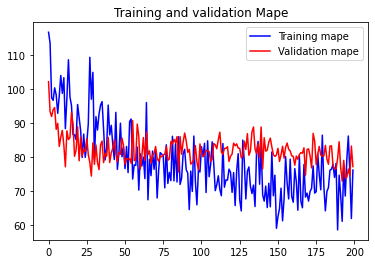

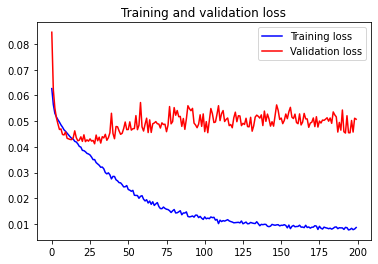

In [40]:
# Checking the plots.
mape = history.history['mape']
val_mape = history.history['val_mape']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(len(mape))

plt.plot(epochs, mape, 'b', label='Training mape')
plt.plot(epochs, val_mape, 'r', label='Validation mape')
plt.title('Training and validation Mape')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Вывод
------
Не видно серьезного переобучения. Поэтому спрогнозируем ключевые точки для тестового dataset

# Прогноз данных

In [41]:
PATH_TEST = 'C:\\Users\\User\\skillfactory\\Тестовое\\Search_for_key_points_on_the_face\\test\\'

In [42]:
transform_1 = albumentations.Compose([
    albumentations.Resize(96, 96, 3)
])

In [43]:
images_test = []

for path in data_test:
    im = Image.open(PATH_TEST + path)
    image = np.array(im.convert('RGB'),'f')
    transformed = transform_1(image=image)
    transformed_image = transformed['image']
    
    images_test.append(transformed_image)

In [44]:
X_test = np.stack([images_test[i] for i in range(0,len(images_test))])

In [45]:
X_test.shape

(1000, 96, 96, 3)

In [46]:
X_test = X_test / 255.

In [47]:
X_test[0].shape

(96, 96, 3)

In [48]:
predictions = model_1.predict(X_test)

In [49]:
predictions_conv = output_pipe.inverse_transform(predictions)

In [50]:
keypoints = []
index = 0

for path in data_test:
    im = Image.open(PATH_TEST + path)
    im = np.array(im.convert('RGB'),'f')
    size_image = im.shape
    transform_2 = albumentations.Compose([albumentations.Resize(size_image[0], size_image[1])
                                         ], keypoint_params=albumentations.KeypointParams(format='xy'))
    keypoint = predictions_conv[index]
    keypoint = keypoint.reshape((14, 2))
    image = X_test[index]
    transformed = transform_2(image=image, keypoints=keypoint)
    
    transformed_keypoints = transformed['keypoints']
    transformed_keypoints = np.array(transformed_keypoints)
    
    
    keypoints.append(transformed_keypoints.reshape(1,28))
    index += 1
    
    

In [51]:
k = np.around(keypoints[0].reshape((14,2)))
im = Image.open(PATH_TEST + '00008.jpg')

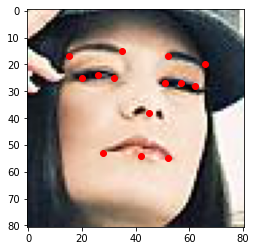

In [52]:
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

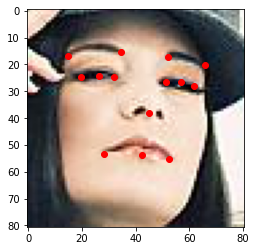

In [53]:
k = keypoints[0].reshape((14,2))
im = Image.open(PATH_TEST + '00008.jpg')
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

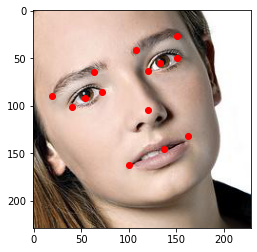

In [54]:
k = keypoints[1].reshape((14,2))
im = Image.open(PATH_TEST + '00014.jpg')
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

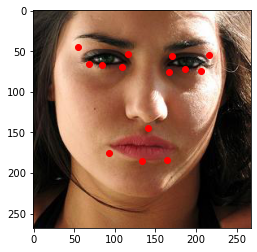

In [55]:
k = keypoints[2].reshape((14,2))
im = Image.open(PATH_TEST + '00015.jpg')
plt.plot(k[:, 0], k[:, 1], 'ro')
plt.imshow(im, cmap='gray')

In [56]:
data_test = pd.DataFrame(keypoints[0])

for index in range(1, len(keypoints)):
    data_test = pd.concat([data_test, pd.DataFrame(keypoints[index])], axis = 0)

In [57]:
data_test.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5',
                     'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11',
                     'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14']


In [58]:
data_test = data_test.reset_index().drop('index', axis = 1)

In [59]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   y1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   y2      1000 non-null   float64
 4   x3      1000 non-null   float64
 5   y3      1000 non-null   float64
 6   x4      1000 non-null   float64
 7   y4      1000 non-null   float64
 8   x5      1000 non-null   float64
 9   y5      1000 non-null   float64
 10  x6      1000 non-null   float64
 11  y6      1000 non-null   float64
 12  x7      1000 non-null   float64
 13  y7      1000 non-null   float64
 14  x8      1000 non-null   float64
 15  y8      1000 non-null   float64
 16  x9      1000 non-null   float64
 17  y9      1000 non-null   float64
 18  x10     1000 non-null   float64
 19  y10     1000 non-null   float64
 20  x11     1000 non-null   float64
 21  y11     1000 non-null   float64
 22  x

In [60]:
data_test.to_excel('data_test.xlsx', sheet_name='prediction')